In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import mannwhitneyu

# Load the red wine dataset
red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red_wine_data = pd.read_csv(red_wine_url, delimiter=';')

# Display the first few rows of the dataset
print(red_wine_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [2]:
print(red_wine_data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [3]:
print(red_wine_data.isnull().sum)

<bound method DataFrame.sum of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False 

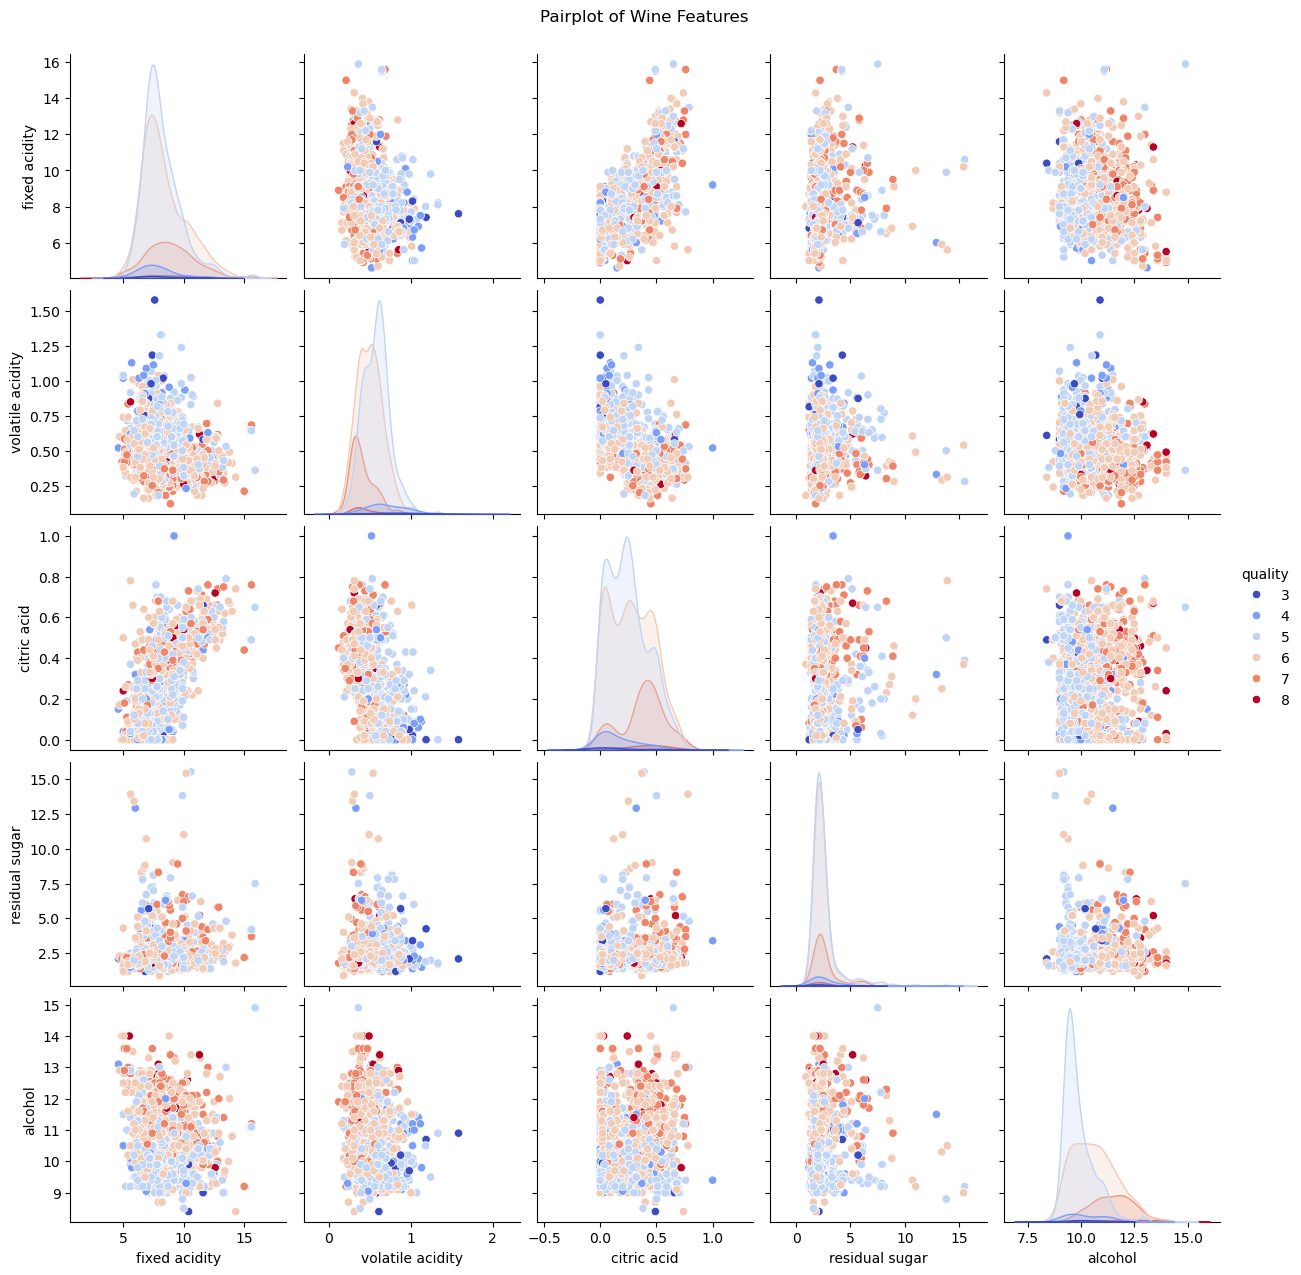

In [4]:
sns.pairplot(red_wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol', 'quality']], hue='quality', palette='coolwarm')
plt.suptitle('Pairplot of Wine Features', y=1.02)
plt.show()

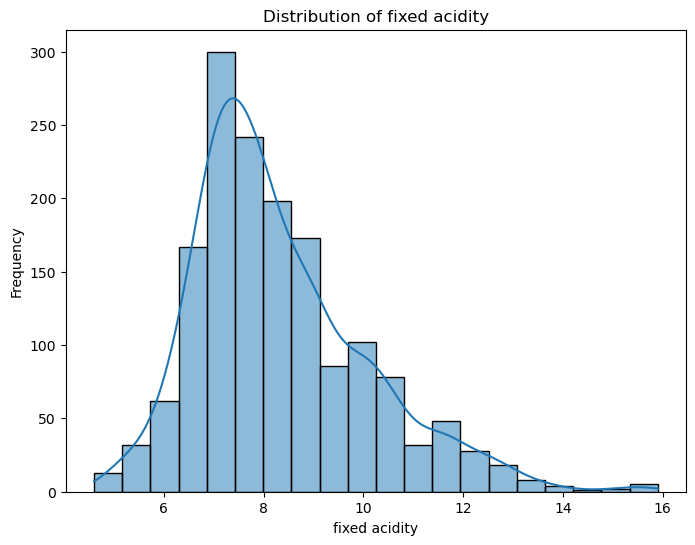

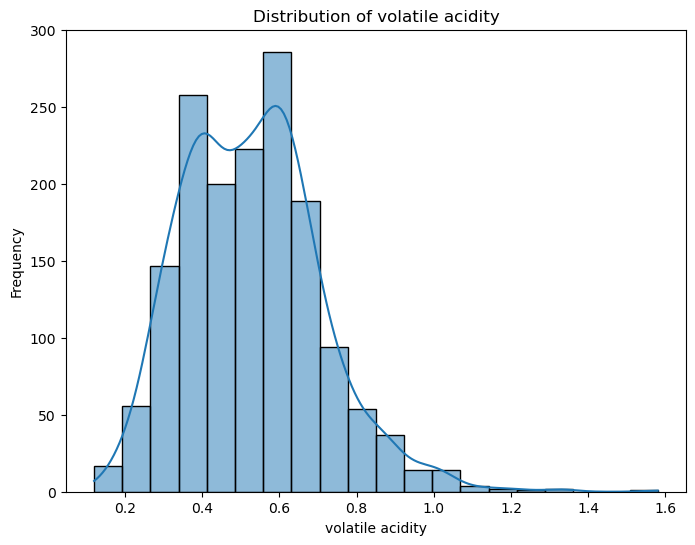

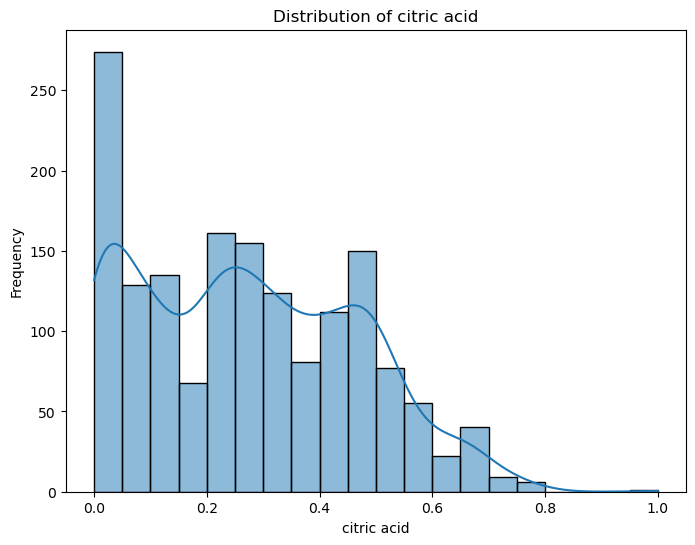

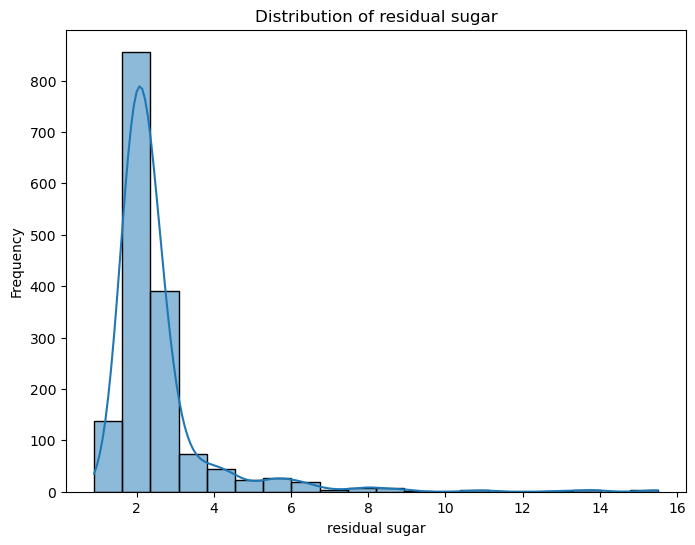

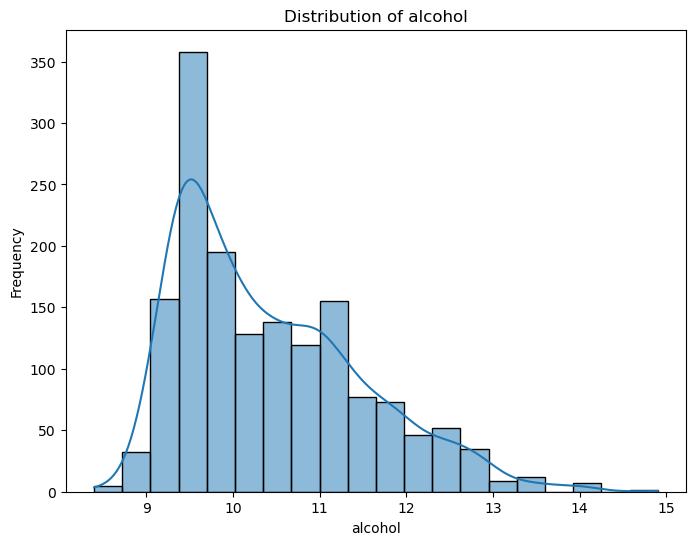

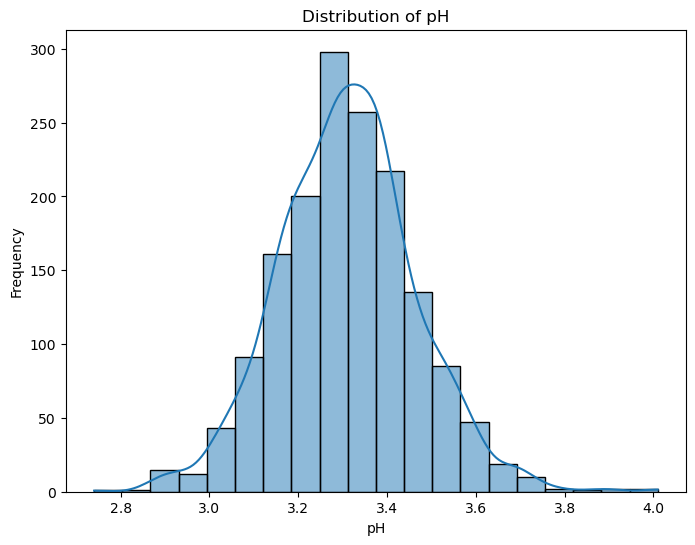

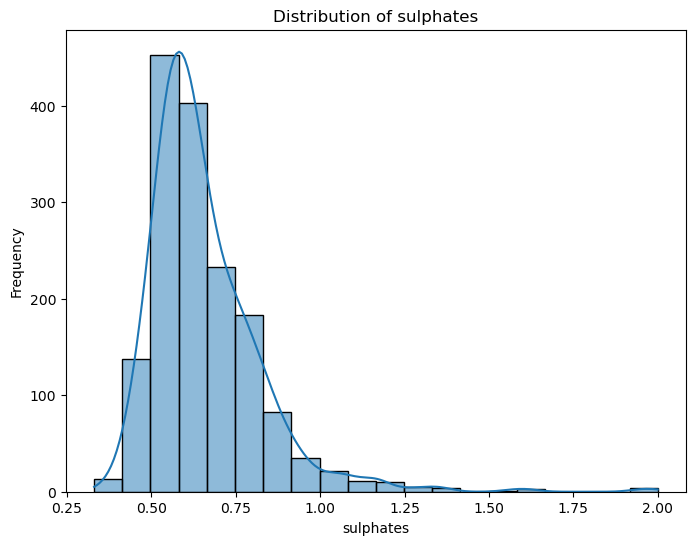

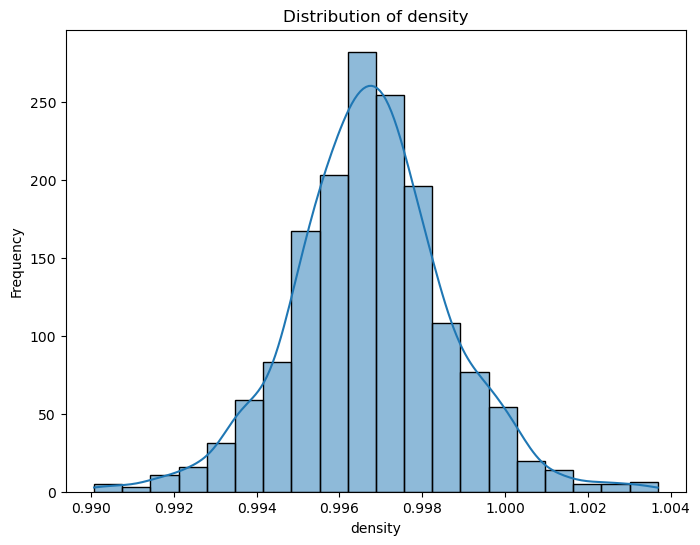

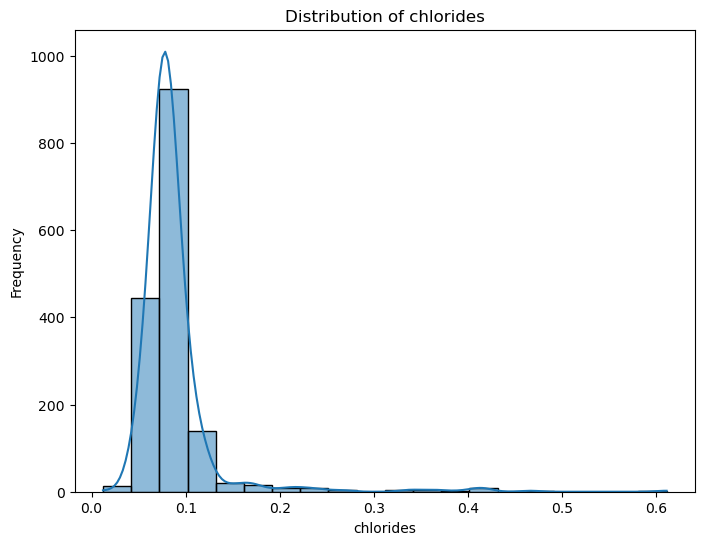

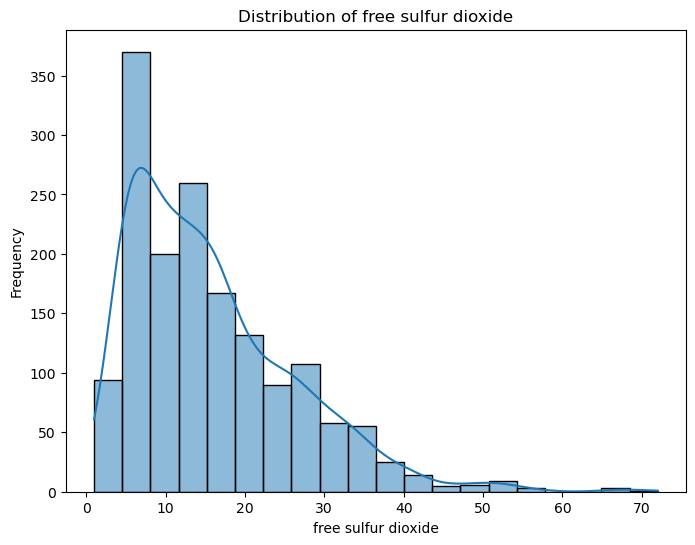

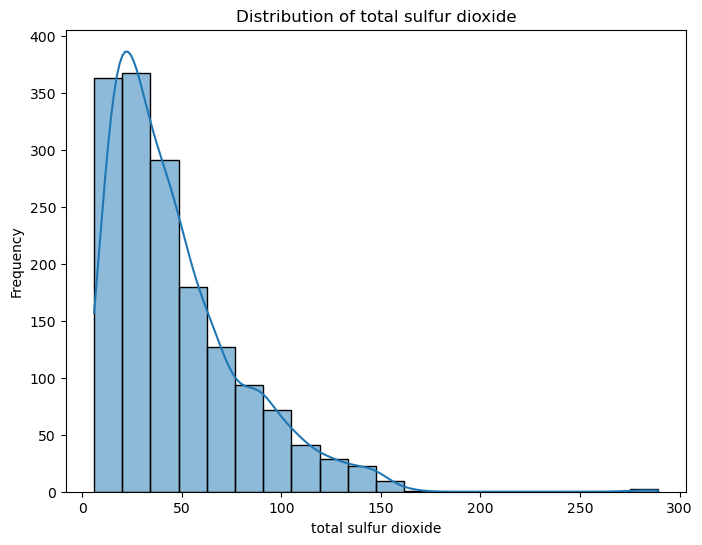

In [5]:
# Plotting histograms for key features in the dataset
features_to_plot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol', 'pH', 'sulphates', 'density', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(red_wine_data[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


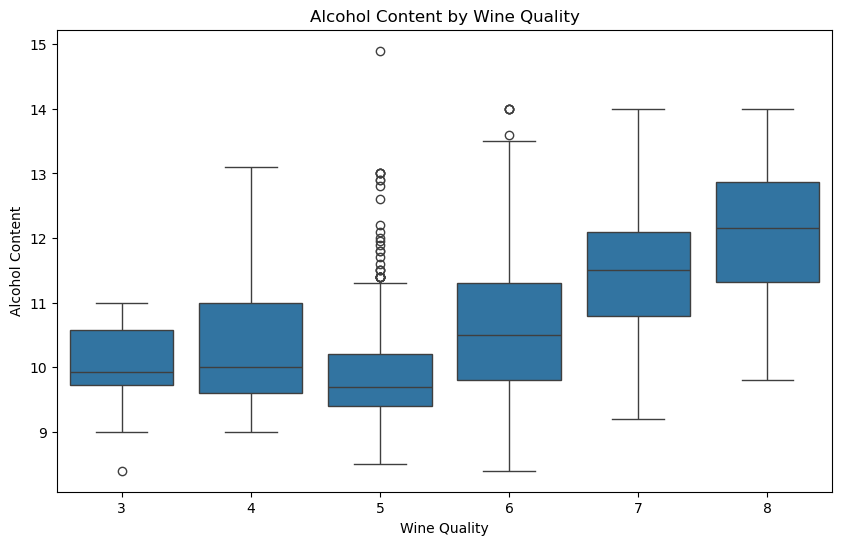

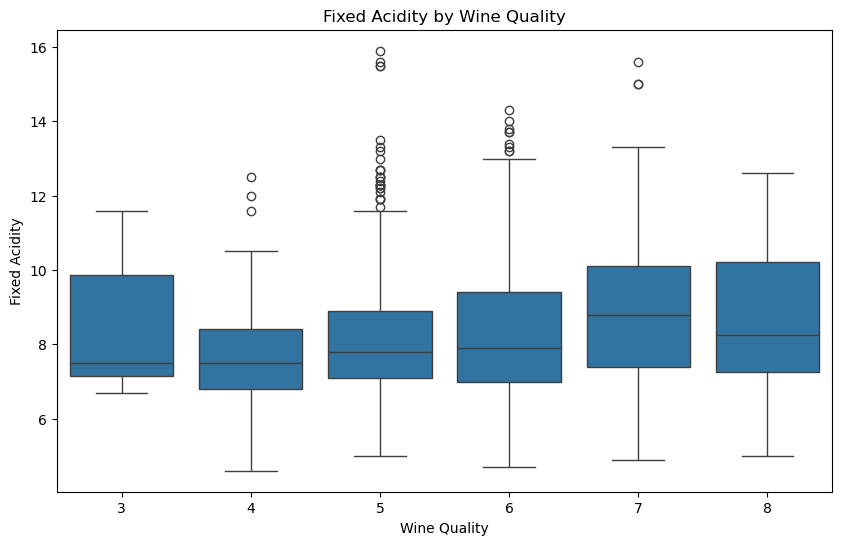

In [6]:
# Boxplot of Alcohol content across wine quality groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=red_wine_data)
plt.title('Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.show()

# Boxplot of Fixed Acidity across wine quality groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='fixed acidity', data=red_wine_data)
plt.title('Fixed Acidity by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Fixed Acidity')
plt.show()


C:\Users\keith\AppData\Local\Temp\ipykernel_8404\2892050408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=red_wine_data, palette='coolwarm')


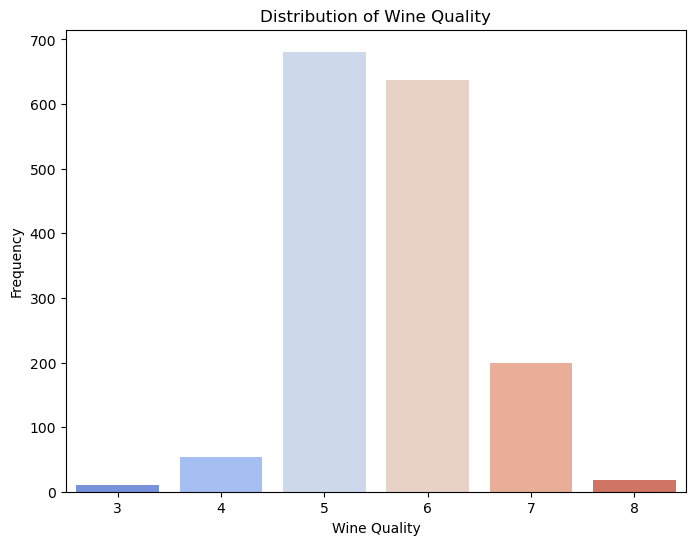

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=red_wine_data, palette='coolwarm')
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.show()

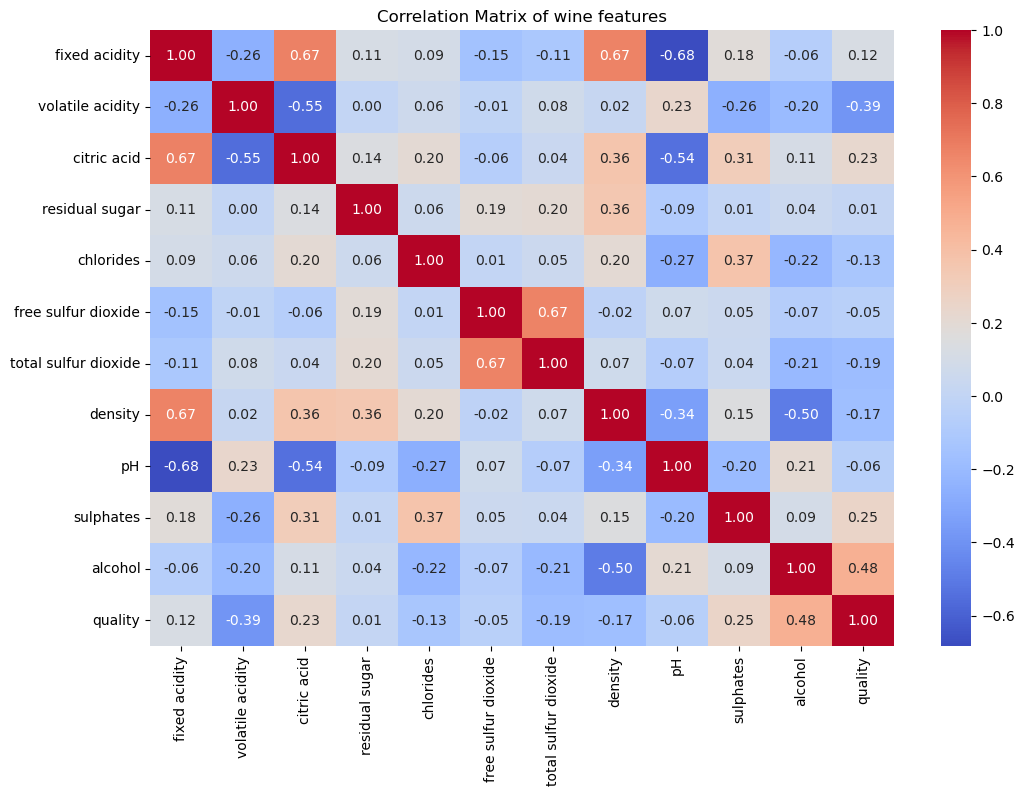

In [8]:
correlation_matrix = red_wine_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of wine features')
plt.show()

In [9]:
from scipy.stats import shapiro

# Significance level
alpha = 0.05

# Shapiro-Wilk test for alcohol content
stat, p_value = shapiro(red_wine_data['alcohol'])
print(f"Shapiro-Wilk Test for Alcohol: Statistic={stat}, P-value={p_value}")
if p_value > alpha:
    print("Result: Fail to reject the null hypothesis (Data is normally distributed)")
else:
    print("Result: Reject the null hypothesis (Data is not normally distributed)")

# Shapiro-Wilk test for other features
features_to_plot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'pH', 'sulphates', 'density', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']
for feature in features_to_plot:
    stat, p_value = shapiro(red_wine_data[feature])
    print(f"Shapiro-Wilk Test for {feature}: Statistic={stat}, P-value={p_value}")
    if p_value > alpha:
        print(f"Result for {feature}: Fail to reject the null hypothesis (Data is normally distributed)")
    else:
        print(f"Result for {feature}: Reject the null hypothesis (Data is not normally distributed)")


Shapiro-Wilk Test for Alcohol: Statistic=0.9288390813054377, P-value=6.644056905730039e-27
Result: Reject the null hypothesis (Data is not normally distributed)
Shapiro-Wilk Test for fixed acidity: Statistic=0.9420297903867135, P-value=1.525011710791387e-24
Result for fixed acidity: Reject the null hypothesis (Data is not normally distributed)
Shapiro-Wilk Test for volatile acidity: Statistic=0.9743368805536368, P-value=2.692934735712727e-16
Result for volatile acidity: Reject the null hypothesis (Data is not normally distributed)
Shapiro-Wilk Test for citric acid: Statistic=0.9552919890668837, P-value=1.0219317829705018e-21
Result for citric acid: Reject the null hypothesis (Data is not normally distributed)
Shapiro-Wilk Test for residual sugar: Statistic=0.5660771057163958, P-value=1.0201616453237868e-52
Result for residual sugar: Reject the null hypothesis (Data is not normally distributed)
Shapiro-Wilk Test for pH: Statistic=0.9934862934498192, P-value=1.7122367757609613e-06
Result

In [12]:
from scipy import stats

# Split the dataset into two groups based on wine quality
low_quality = red_wine_data[red_wine_data['quality'] <= 6]
high_quality = red_wine_data[red_wine_data['quality'] > 6]

# Perform the t-test
t_stat, p_value = stats.ttest_ind(low_quality['alcohol'], high_quality['alcohol'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -17.822763607394528
P-value: 6.016774226316707e-65


In [13]:
# Perform ANOVA to compare alcohol content across wine quality groups
anova_result = stats.f_oneway(*[red_wine_data[red_wine_data['quality'] == q]['alcohol'] for q in red_wine_data['quality'].unique()])

print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA P-value: {anova_result.pvalue}")


ANOVA F-statistic: 115.85479746682738
ANOVA P-value: 1.2098951580566747e-104


In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
model = ols('alcohol ~ C(quality)', data=red_wine_data).fit()
tukey = pairwise_tukeyhsd(endog=red_wine_data['alcohol'], groups=red_wine_data['quality'], alpha=0.05)

# Print Tukey's HSD test results
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      4   0.3101 0.9231  -0.589 1.2092  False
     3      5  -0.0553    1.0  -0.886 0.7754  False
     3      6   0.6745 0.1883 -0.1566 1.5056  False
     3      7   1.5109    0.0  0.6658 2.3561   True
     3      8   2.1394    0.0  1.1109  3.168   True
     4      5  -0.3654 0.0574 -0.7373 0.0065  False
     4      6   0.3644 0.0597 -0.0084 0.7372  False
     4      7   1.2008    0.0  0.7977 1.6039   True
     4      8   1.8294    0.0  1.1179 2.5408   True
     5      6   0.7298    0.0  0.5861 0.8735   True
     5      7   1.5662    0.0  1.3561 1.7764   True
     5      8   2.1947    0.0   1.572 2.8175   True
     6      7   0.8364    0.0  0.6247 1.0481   True
     6      8   1.4649    0.0  0.8416 2.0882   True
     7      8   0.6285 0.0589 -0.0133 1.2704  False
---------------------------------------------------
